In [7]:
# Basic import items --
import os.path
import sys
import numpy as np

# For saving MCMC CurveFitters and Objectives
import pickle

# Import PyPXR through GitHub
sys.path.append("C:/Users/hduva/CarbonLab/P-RSoXR/src/pypxr") # Exact path for laptop
from reflutils import *
from reflectivity import *
from structure import *
# Additional support functions
from mcmc_analysis.utilities import compile_data_hdf5, load_prsoxr_hdf5, build_tensor, LogpExtra_rough
from mcmc_analysis.export_results import export_mcmc_summary

# Required modules from Refnx
from refnx.dataset import ReflectDataset # Object used to define data
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective # For fitting
from refnx._lib.emcee.moves.de import * #Differential Evolution MCMC move - typically used in these fits
sns.set_style("darkgrid")

%matplotlib inline

<Axes: xlabel='Q'>

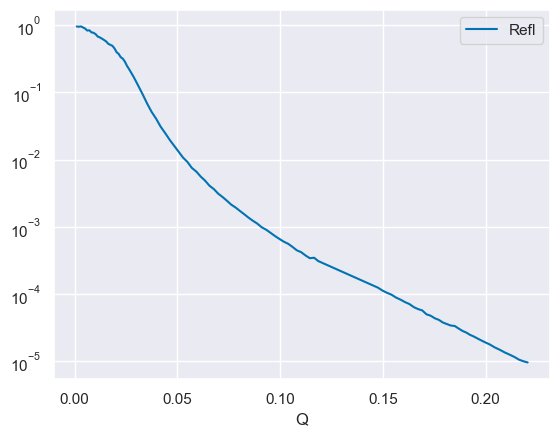

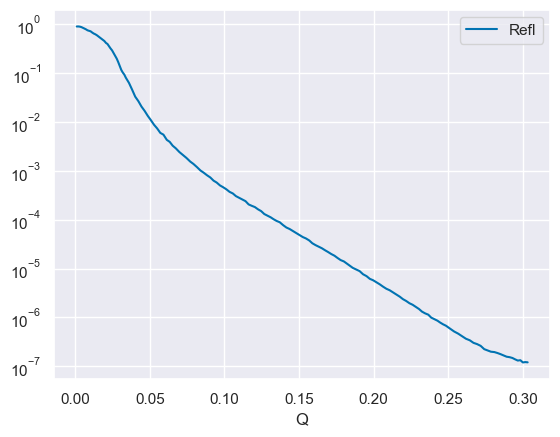

In [8]:
d_path = r"C:\Users\Harlan Heilman\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.csv"
d_path_l = r"C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.csv"

bareSi_250_masked = pd.read_csv(d_path_l+r"\bareSi_250_masked.csv", index_col=0)
bareSi_320 = pd.read_csv(d_path_l+r"\bareSi_320.csv", index_col=0)

bareSi_250_masked.plot(x = "Q", y = "Refl", logy=True)
bareSi_320.plot(x = "Q", y = "Refl", logy=True)

In [ ]:
carbon = [-0.003285347, 0.000833589]
dsa_beta = [0.001766276, 0.001690298]

bulk_bire = [-0.000154791, -0.000337602]
bulk_dichro = [0.000154791, 0.000337602]

surface_bire = [-0.00005, -0.00003]
surface_dichro = [0.00005, 0.00003] 

substrate_bire = [-0.0001, -0.0003]
substrate_dichro = [0.0001, 0.0003] 

# Construct full tensor using utilities function
dsa_bulk = build_tensor(zip(dsa_delta, dsa_beta, bulk_bire, bulk_dichro))
dsa_surface = build_tensor(zip(dsa_delta, dsa_beta, surface_bire, surface_dichro))
dsa_substrate = build_tensor(zip(dsa_delta, dsa_beta, substrate_bire, substrate_dichro))

ratio_bire_dichro = [1.06828, -1.0421] # From Angle dependent NEXAFS
ratio_bire_en = [1, -0.867908] # From Angle dependent NEXAFS